# EXERCISES Linear and Polynomial Regression

(concrete compressive strength dataset)

### Task 1 : Import libraries

Import the necessary libraries (pandas, Numpy, Matplotlib, Seaborn and scikit-learn libraries)

In [12]:
# IMPORTS EN DATA PREPARATIE
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns                                           # theorie: gegevens inladen (slides Python basics)
from sklearn.model_selection import GridSearchCV, train_test_split  # theorie: cross-validatie en train/test split (slides Hyperparameters)
from sklearn.pipeline import Pipeline                           # theorie: pipelines voor workflow (slides Hyperparameters)
from sklearn.preprocessing import OneHotEncoder                 # theorie: categorische encoding (slides Data visualisatie)
from sklearn.compose import ColumnTransformer                   # theorie: feature preprocessing (slides Hyperparameters)
from sklearn.ensemble import RandomForestClassifier             # theorie: basisklas voor tuning (slides Decision Trees)
from sklearn.metrics import classification_report               # theorie: evaluatie metrics (slides Hyperparameters)

### Task 2 : Load the data

Load the 'Concrete_Data.csv' from the data directory and display the first rows.

In [7]:
data = pd.read_csv("../Datasets/Concrete_data.csv", sep=",")
data.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Task 3 : Key statistics and missing values

Understand the dataset by displaying key statistics and check for missing values

In [8]:
stats = data.describe()
print(stats)

            cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000  

In [9]:
missing = data.isnull().sum()
print(missing)

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


### Task 4 : Correlations between features

Calculate the correlation matrix to understand the relationships between the target variable 'csMPa' and all other variables (predictors). You can use the Pandas ``.corr()`` method for this.

In [10]:
corr_data = data.corr()
print(corr_data)

                    cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.275216 -0.397467 -0.081587          0.092386   
slag             -0.275216  1.000000 -0.323580  0.107252          0.043270   
flyash           -0.397467 -0.323580  1.000000 -0.256984          0.377503   
water            -0.081587  0.107252 -0.256984  1.000000         -0.657533   
superplasticizer  0.092386  0.043270  0.377503 -0.657533          1.000000   
coarseaggregate  -0.109349 -0.283999 -0.009961 -0.182294         -0.265999   
fineaggregate    -0.222718 -0.281603  0.079108 -0.450661          0.222691   
age               0.081946 -0.044246 -0.154371  0.277618         -0.192700   
csMPa             0.497832  0.134829 -0.105755 -0.289633          0.366079   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.081946  0.497832  
slag                    -0.283999      -0.281603 -0.044246  0.134829  
flyash

Plot a heatmap of the correlation matrix. You can use ``sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')`` plot for this. Add a title to the plot.

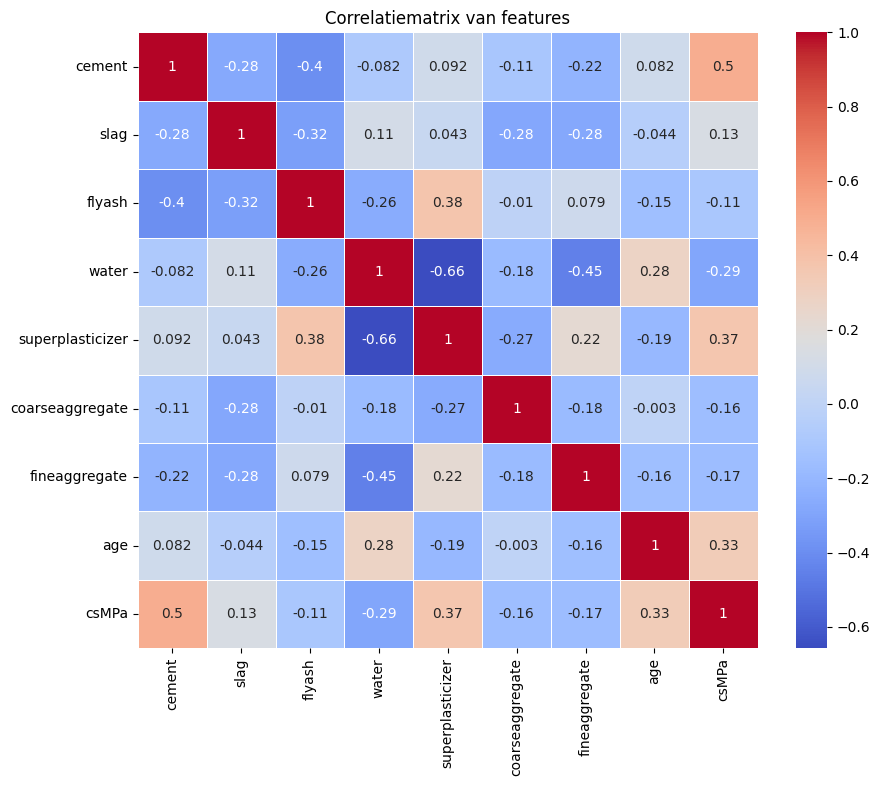

In [17]:
# Plot de heatmap van de correlatiematrix (Seaborn heatmap) 
plt.figure(figsize=(10, 8))       # bepaal de figuur-grootte
sns.heatmap(
    corr_data, 
    annot=True,                   # toon de waarden in de cellen
    cmap='coolwarm',              # kleurenmap
    linewidths=0.5                # lijntjes tussen cellen
)
plt.title('Correlatiematrix van features')  # titel
plt.show()                                 # toon de plot


### Task 5 : Simple linear regression

Perform a simple linear regression with 'csMPa' as target and one feature.

What feature seems to be the best candidate for the job?

Use a standard test setup (training set and test set) and make the predictions 
for the observations in the test set.

In [19]:
from regression import simple_linear_regression  # importeer onze functie

# 2. Kies de beste feature; bijvoorbeeld 'cement'
result = simple_linear_regression(
    data,
    feature="cement",
    target="csMPa",
    test_size=0.2,
    random_state=42
)

# 3. Resultaten tonen
model = result["model"]
print(f"Intercept:   {model.intercept_:.3f}")     # b0
print(f"Coefficient: {model.coef_[0]:.3f}")       # b1
print(f"R²-score:    {result['r2']:.3f}")         # verklaringskracht
print(f"RMSE:        {result['rmse']:.3f}")       # gemiddelde voorspelfout

Intercept:   13.785
Coefficient: 0.078
R²-score:    0.252
RMSE:        13.885


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Task 6 : Validation

Calculate and display the R-squared and Mean Squared Error (MSE) for the simple linear regression.

In [21]:
from validate_regression import evaluate_regression  # importeer de validatiefunctie

# 2. Eenvoudige regressie uitvoeren (bijv. met 'cement')
res = simple_linear_regression(
    data,
    feature="cement",
    target="csMPa",
    test_size=0.2,
    random_state=42
)

# 3. Validatie: R² en MSE berekenen en tonen
eval_results = evaluate_regression(res["y_test"], res["y_pred"])


R²-score: 0.252
MSE:      192.785


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Task 7 : Regression line

Plot the regression line along with the test data points and print the intercept and coefficients.

In [22]:
# 1. Haal zaken uit je resultaat-dict (uit simple_linear_regression)
model   = res["model"]     # getraind LinearRegression-object
X_test  = res["X_test"]    # DataFrame met test-kenmerken
y_test  = res["y_test"]    # Series met werkelijke test-targets
y_pred  = res["y_pred"]    # array met voorspellingen

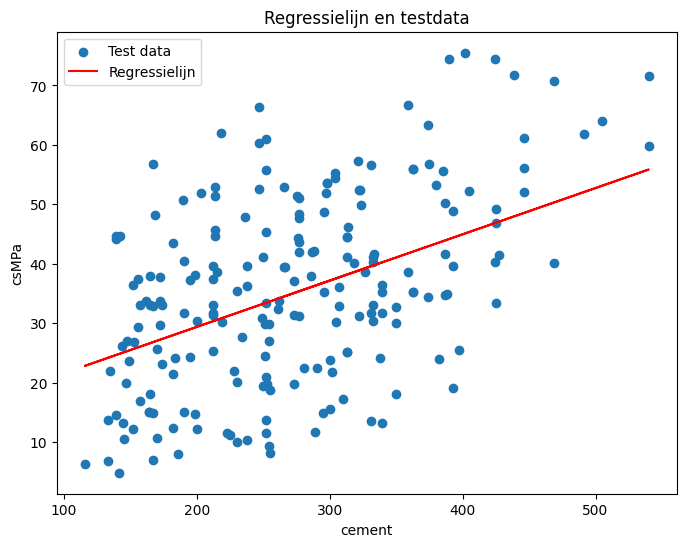

Intercept:   13.785
Coefficient: 0.078


In [23]:
# 2. Plot testdata als punten (scatter) en regressielijn
plt.figure(figsize=(8, 6))                                     # figuur-grootte bepalen
plt.scatter(X_test, y_test, label="Test data")                 # werkelijke waarden
plt.plot(X_test, y_pred, color="red", label="Regressielijn")   # voorspelde lijn
plt.xlabel(X_test.columns[0])                                  # x-as label (feature-naam)
plt.ylabel("csMPa")                                            # y-as label (target)
plt.title("Regressielijn en testdata")                         # titel plot
plt.legend()                                                   # legenda tonen
plt.show()                                                     # grafiek weergeven

# 3. Print intercept en coefficient
print(f"Intercept:   {model.intercept_:.3f}")  # b₀
print(f"Coefficient: {model.coef_[0]:.3f}")    # b₁

### Task 8 : Linear regression with more predictors

As we see the single feature explains the compressive strength not to well. We continue our search for a better model:
include more than one variable in our regression model. What other 2 features are potential good candidates?
Make predictions for the test set and calculate the Mean Squared Error and R-squared. Print the coefficients and the intercept.

In [44]:
from regression_vals import multiple_linear_regression

# 1. Kies twee goede predictors, bijv. ['cement', 'slag']
features = ["cement", "slag"]

# 2. Voer meervoudige regressie uit
result = multiple_linear_regression(
    data,
    features=features,
    target="csMPa",
    test_size=0.2,
    random_state=42
)

# 3. Print intercept en coëfficiënten
model = result["model"]
print(f"Intercept:   {model.intercept_:.3f}")    # b₀
print(f"Coefficients: {model.coef_}")              # [a₁, a₂]

# 4. Toon R² en RMSE
print(f"R²-score:    {result['r2']:.3f}")
print(f"RMSE:         {result['rmse']:.3f}")

Intercept:   4.779
Coefficients: [0.09296289 0.06369799]
R²-score:    0.243
RMSE:         13.966


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Task 9 : Polynomial regression

Again, we will try to create a better model. We will use the same features as in task 8, but now we will use a 4 order polynomial model. Compair the Mean Squared Error and R-squared scores.

In [59]:
# Alternatieve methode ZONDER make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Nu kun je Task 9 doen
X_train_poly = X_train[['cement', 'age']]
X_test_poly = X_test[['cement', 'age']]

# Maak polynomial features (4e graad)
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly_transformed = poly_features.fit_transform(X_train_poly)
X_test_poly_transformed = poly_features.transform(X_test_poly)

# Maak en train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly_transformed, y_train)

# Voorspel
y_pred_poly = poly_model.predict(X_test_poly_transformed)

# Bereken metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial MSE: {mse_poly:.4f}")
print(f"Polynomial R²: {r2_poly:.4f}")

Polynomial MSE: 107.1429
Polynomial R²: 0.5842
